# PROJECT : 
## LENDING CLUB CASE STUDY
>Analysis in banking and financial services on how data is used to minimise the risk of losing money while lending to customers. <br>
>Method of analysis : __Exploratory Data Analysis(EDA)__
#### BUSINESS OBJECTIVES : 
>A consumer finance company is specialised in lending various types of loans to urban customers. This company is the largest __online loan marketplace facilitating personal loans, business loans and financing for medical procedures__. Borrowers can easily access lower interest rate loans through a fast online interface. Lending loans to __'risky'__ applicants is the largest source of financial loss (CREDIT LOSS). __CREDIT LOSS__ - Amount of money lost by lender when a borrower refuses to pay or runs away with the money owned. These borrowers are said to be 'defaulted' customers.
>When the company receives a loan application, __'loan approval decision'__ has to be taken by the company based on applicant's profile.There are two types of risks in approving loans, which may lead to __CREDIT LOSS__ for the company.
>#### RISKS :
>- If the applicant is __likely to repay__ the loan, then __not approving loan__ is a loss of business __(rejecting loans for non - default)__.
>- If the applicant is __not likely to repay__ the loan, then __approving loan__ may lead to financial loss __(approving loans for default)__.

>The given dataset contains information about past loans and each row represents the loan details of the applicants. 
#### AIM OF THE PROJECT : 
>Aim is to identify patterns that indicates whether an applicant is likely to __'default'__, so that the company can decide either to deny the loan or reduce the loan amount or lend the loan amount for higher interest rates. Risky loan applicants have to be identified so that the company can cut down the amount of CREDIT LOSS. 
We use __Exploratory Data Analysis (EDA)__ for this purpose. __Driver variables__ (variables which are strong indicators of 'DEFAULT') have to be identified behind loan 'default' so that the company can use this knowledge for its __Portfolio and Risk assessment__.
>When a person applies for a loan, __2 types of decisions taken by the company__ : 
>#### 1. Loan Accepted : 
>>  If the company approves loan, the 3 possible scenarios are : 
>>   - __Fully Paid__ : Fully paid applicant (Principal + Interest) ('not defaulted').
>>   - __Current__ : Applicant is in the process of paying installments (tenure of loan is not yet completed - 'not defaulted')
>>   - __Charged Off__ : Applicant did not pay the installments in due time for longer time period ('defaulted')
>#### 2. Loan Rejected :
>>  Company has __rejected the loan__ and so transaction details are not available in the dataset.  
## Four major parts of this project : 
>1. Data understanding
>2. Data cleaning which involves 
>3. Data Analysis 
>4. Recommendations         

>>>  GitHub Link - https://github.com/GAYTHRI-T/LendingClubCaseStudy

## 1. DATA UNDERSTANDING

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

### Read the "loan" Dataset

In [2]:
loan_df = pd.read_csv('loan.csv',low_memory=False, dtype='unicode')
#loan_df = pd.read_csv(r'C:\Users\gayth\OneDrive\Desktop\Machine Learning and AI\Module 3 - Lending Club case study\loan.csv',
                      #low_memory=False, dtype='unicode')

In [3]:
# First 5 records of the dataset
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


### Shape of the dataset(rows,columns)

In [4]:
loan_df.shape

(39717, 111)

### Basic information of the dataset

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


### Description of the dataset

In [6]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


### Variables in the dataset 

In [7]:
set(loan_df)

{'acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_

## Basic cleanup of large number of missing values 

In [8]:
# Number of missing values in each column

loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Percentage of missing values in each column corresponding to total number of records

round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2).sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [10]:
'''
The columns that possess more than 50% missing values are insignificant and may distort the analysis.
So drop the columns that has more than 50% missing values.
'''

loan_df = loan_df.dropna(axis=1,thresh=int(len(loan_df.index)/2))

In [11]:
# Percentage of missing values in each column corresponding to total number of records after dropping columns

round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2).sort_values(ascending=False).head(15)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
dtype: float64

In [12]:
# Variables in the dataframe after removing huge number of missing values

set(loan_df)

{'acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'tax_liens',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'verification_status',
 'zip_code'}

In [13]:
# Maximum number of missing values across the rows of the dataset

loan_df.isnull().sum(axis=1).max()

6

Since the maximum number of missing values across rows is significantly low, 
there is no need to delete records in basic cleanup.

In [14]:
# Shape of the dataframe after basic cleanup

loan_df.shape

(39717, 54)

## 2. DATA CLEANING 
- Fixing rows and columns
- Fixing missing values
- Standardizing values
- Fixing invalid values
- Filtering data

## Fixing Rows and Columns

In [15]:
# Drop the column 'desc' as it has no significance in analysis and has 32.58% missing values

loan_df = loan_df.drop('desc', axis=1)

In [16]:
# Drop the column 'url' as it has no significance in analysis

loan_df = loan_df.drop('url', axis=1)

In [17]:
# Unique values of each columns in the dataframe (to determine the repetitve or same values of columns)

loan_df.apply(lambda x : x.unique())

id                            [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                     [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                     [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt_inv               [4975, 2500, 2400, 10000, 3000, 5000, 7000, 56...
term                                                   [ 36 months,  60 months]
int_rate                      [10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...
installment                   [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
grade                                                     [B, C, A, E, F, D, G]
sub_grade                     [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title                     [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length                    [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                          

In [18]:
'''
The columns ['pymnt_plan','initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'] 
has same values for all rows. 
The columns ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'] contains
only '0' and 'nan' as values. Hence drop the columns that are insignificant in analysis.
'''

loan_df = loan_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code','application_type',
                        'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis=1)

In [19]:
# Set of variables after deleting insignificant columns

set(loan_df)

{'addr_state',
 'annual_inc',
 'collection_recovery_fee',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'verification_status',
 'zip_code'}

In [20]:
# Shape of the dataframe after deleting insignificant columns

loan_df.shape

(39717, 43)

## Fixing Missing values

In [21]:
# Number of missing values in each column

loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

In [22]:
# Frequency of unique values in 'pub_rec_bankruptcies'

loan_df['pub_rec_bankruptcies'].value_counts()

0    37339
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# Frequency of unique values in 'revol_util'

loan_df['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [24]:
'''
DROPPING MISSING VALUES

The columns 'emp_title','emp_length' and 'pub_rec_bankruptcies' are significant for analysis but they possess comparatively
more missing values. We cannot impute 'emp_title' and 'emp_length' by assumptions as it may lead to chaos. So drop the rows
that has missing values of 'emp_title' and 'emp_length'.


IMPUTING MISSING VALUES

The column 'pub_rec_bankruptcies' contains 697 missing values and about 94% records contains '0' as the value. So let us 
impute the missing values in 'pub_rec_bankruptcies' with '0'. The column 'revol_util' contains 50 missing values and about
% record contains "0.00%" as value. So let us impute the missing values in 'revol_util' with "0.00%".


TREATING AS MISSING VALUES

The columns 'title','last_payment_d','last_credit_pull_d' have comparatively small number of missing values
and they cannot be imputed by assumptions. So let us treat them as missing values itself and fill them with "NAN" or "NaT"

'''

remove_null_values = ['emp_length','emp_title']

In [25]:
# Dropping rows that contains missing values of 'emp_length','emp_title'

for column in remove_null_values:
    loan_df = loan_df[~loan_df[column].isnull()]

In [26]:
# Impute the missing values of 'pub_rec_bankruptcies' with 0

loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(0)

In [27]:
# Impute the missing values of 'revol_util' with "0.00%"

loan_df['revol_util'] = loan_df['revol_util'].fillna("0.00%")

In [28]:
# Populate the missing values of 'title' with "NAN"

loan_df['title'] = loan_df['title'].fillna("NAN")

In [29]:
# Populate the missing values of 'last_pymnt_d' with "NaT"

loan_df['last_pymnt_d'] = loan_df['last_pymnt_d'].fillna("NaT")

In [30]:
# Populate the missing values of 'last_credit_pull_d' with "NaT"

loan_df['last_credit_pull_d'] = loan_df['last_credit_pull_d'].fillna("NaT")

In [31]:
# Sum of missing values of all columns

loan_df.isnull().sum().sum()

0

In [32]:
# Shape of the dataframe after treating missing values

loan_df.shape

(37202, 43)

## Standardizing values

In [33]:
# Information about the dataframe loan_df

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       37202 non-null  object
 1   member_id                37202 non-null  object
 2   loan_amnt                37202 non-null  object
 3   funded_amnt              37202 non-null  object
 4   funded_amnt_inv          37202 non-null  object
 5   term                     37202 non-null  object
 6   int_rate                 37202 non-null  object
 7   installment              37202 non-null  object
 8   grade                    37202 non-null  object
 9   sub_grade                37202 non-null  object
 10  emp_title                37202 non-null  object
 11  emp_length               37202 non-null  object
 12  home_ownership           37202 non-null  object
 13  annual_inc               37202 non-null  object
 14  verification_status      37202 non-nul

In [34]:
# Columns that has to be converted to "numeric" (int or float) type

conv_obj_to_numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','revol_bal','out_prncp',
                       'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_prncp',
                       'total_rec_late_fee','collection_recovery_fee','recoveries','last_pymnt_amnt','pub_rec_bankruptcies',
                       'delinq_2yrs','inq_last_6mths','open_acc','pub_rec']

In [35]:
# Convert the desired columns to "numeric" (int or float)

loan_df[conv_obj_to_numeric] = loan_df[conv_obj_to_numeric].apply(pd.to_numeric)

In [36]:
# Pick up the columns of 'float' type to round off them to 2 decimal places (standardizing)

roundOff_float_cols = ['funded_amnt_inv','installment','annual_inc','dti','out_prncp','out_prncp_inv','total_pymnt',
                       'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                       'collection_recovery_fee','last_pymnt_amnt']

In [37]:
# Round off float values to 2 decimal places

loan_df[roundOff_float_cols] = loan_df[roundOff_float_cols].round(2)

In [38]:
# Information of the dataframe after changing desired columns to numeric type

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37202 non-null  object 
 1   member_id                37202 non-null  object 
 2   loan_amnt                37202 non-null  int64  
 3   funded_amnt              37202 non-null  int64  
 4   funded_amnt_inv          37202 non-null  float64
 5   term                     37202 non-null  object 
 6   int_rate                 37202 non-null  object 
 7   installment              37202 non-null  float64
 8   grade                    37202 non-null  object 
 9   sub_grade                37202 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               37202 non-null  object 
 12  home_ownership           37202 non-null  object 
 13  annual_inc               37202 non-null  float64
 14  verification_status   

## Fixing invalid values

In [39]:
# Unique values of each columns in the dataframe

loan_df.apply(lambda x : x.unique())

id                         [1077430, 1076863, 1075358, 1075269, 1069639, ...
member_id                  [1314167, 1277178, 1311748, 1311441, 1304742, ...
loan_amnt                  [2500, 10000, 3000, 5000, 7000, 5375, 6500, 12...
funded_amnt                [2500, 10000, 3000, 5000, 7000, 5375, 6500, 12...
funded_amnt_inv            [2500.0, 10000.0, 3000.0, 5000.0, 7000.0, 5350...
term                                                [ 60 months,  36 months]
int_rate                   [15.27%, 13.49%, 12.69%, 7.90%, 15.96%, 18.64%...
installment                [59.83, 339.31, 67.79, 156.46, 170.08, 109.43,...
grade                                                  [C, B, A, E, D, F, G]
sub_grade                  [C4, C1, B5, A4, C5, E1, C3, B1, B2, D1, A1, B...
emp_title                  [Ryder, AIR RESOURCES BOARD, University Medica...
emp_length                 [< 1 year, 10+ years, 1 year, 3 years, 8 years...
home_ownership                            [RENT, OWN, MORTGAGE, OTHER, NONE]

In [40]:
# Remove the % in 'int_rate' and convert to float type thereby rounding off to 2 decimal places

loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : round(float(x[:-1]),2))

In [41]:
# Remove the % in 'revol_util' and convert to float type thereby rounding off to 2 decimal places

loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x : round(float(x[:-1]),2))

In [42]:
# Function to convert the string(MON-YY) to valid date format(YYYY-MM-DD)

def to_valid_date_format(x):
    if(x == "NaT"):
        return pd.to_datetime(x)
    else:
        if (int(x[-2:]) in range(0,12)):
            year = "20"+x[-2:]
        else:
            year = "19"+x[-2:]
        day = "01"
        month = x[:3]
        month_dict = {"Jan" : "01","Feb" : "02","Mar" : "03","Apr" : "04","May" : "05","Jun" : "06",
                      "Jul" : "07","Aug" : "08","Sep" : "09","Oct" : "10","Nov" : "11","Dec" : "12"}
        for key,value in month_dict.items():
            if(month == key):
                month_in_numbers = value
                break
        valid_date_format = pd.to_datetime(year+"/"+month_in_numbers+"/"+day, format="%Y-%m-%d")
        return valid_date_format

In [43]:
# Columns that has to be converted to 'datetime' type

date_columns = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [44]:
# Convert the desired columns to valid date format of 'datetime' type

for column in date_columns:
    loan_df[column] = loan_df[column].apply(lambda x : to_valid_date_format(x))

In [45]:
# Creating a derived column 'issue_d_years' which is derived from 'issue_d'
# Deriving the year from loan issue date

loan_df['issue_d_years'] = loan_df['issue_d'].dt.year 

In [46]:
# Creating a derived column 'issue_d_months' which is derived from 'issue_d'
# Deriving the month from loan issue date

loan_df['issue_d_months'] = loan_df['issue_d'].dt.month 

In [47]:
# Information about the dataframe after changing the datatypes of columns to valid format

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37202 non-null  object        
 1   member_id                37202 non-null  object        
 2   loan_amnt                37202 non-null  int64         
 3   funded_amnt              37202 non-null  int64         
 4   funded_amnt_inv          37202 non-null  float64       
 5   term                     37202 non-null  object        
 6   int_rate                 37202 non-null  float64       
 7   installment              37202 non-null  float64       
 8   grade                    37202 non-null  object        
 9   sub_grade                37202 non-null  object        
 10  emp_title                37202 non-null  object        
 11  emp_length               37202 non-null  object        
 12  home_ownership           37202 n

In [48]:
# First 5 records of the dataframe after data cleaning

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_years,issue_d_months
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,1913-04-01,119.66,1913-09-01,0,2011,12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,1915-01-01,357.48,1916-04-01,0,2011,12
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,1916-05-01,67.79,1916-05-01,0,2011,12
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,1915-01-01,161.03,1916-01-01,0,2011,12
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,3125.23,0.00,0.00,0.00,1916-05-01,1313.76,1916-05-01,0,2011,12


In [49]:
# Shape of the dataframe after data cleaning

loan_df.shape

(37202, 45)

## Filtering Data

In [50]:
# Current loan details are not needed for analysing defaults. Hence, drop the rows that contains loan_status as "Current".

loan_df = loan_df[loan_df['loan_status']!="Current"]

### The target variable is 'loan_status' - the values are 'Fully Paid' (non - default) or 'Charged Off' (default)

#### The most significant variables taken for analysing default / non-default records are:

- id
- loan_amnt
- term
- int_rate
- grade
- sub_grade
- emp_title
- emp_length
- home_ownership
- annual_inc
- verification_status
- loan_status
- purpose
- addr_state
- dti
- pub_rec_bankruptcies
- issue_d_months
- issue_d_years

'id' is retained since it is the unique identifier column for the dataframe 'loan_df'.
Therefore we shall drop other columns from the dataframe.

In [51]:
# Filter significant data for analysis purpose

loan_df = loan_df[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_title','emp_length',
                   'home_ownership','annual_inc','verification_status','loan_status','purpose','addr_state',
                   'dti','pub_rec_bankruptcies','issue_d_months','issue_d_years']]

In [52]:
# Shape of the dataframe after filtering columns

loan_df.shape

(36136, 18)

<AxesSubplot:>

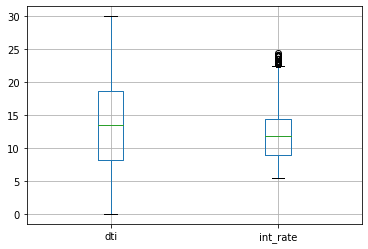

In [53]:
# Boxplot of 'dti' and 'int_rate' to check for outliers

loan_df.boxplot(column=['dti','int_rate']) 

<AxesSubplot:>

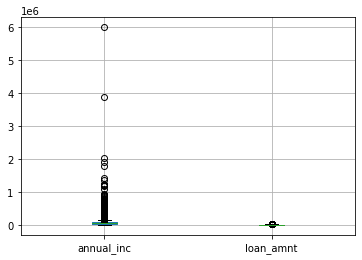

In [54]:
# Boxplot of 'annual_inc' and 'loan_amnt' to check for outliers

loan_df.boxplot(column=['annual_inc','loan_amnt']) 

In [55]:
# Checking outliers in annual_inc

loan_df['annual_inc'].describe()

count    3.613600e+04
mean     6.903275e+04
std      6.462191e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [56]:
'''
At 75th percentile, the value is nearly 82000 but suddenly it peaks to maximum of 6000000. This is an indication of an
outlier and hence it has to be removed.

Check at which percentile the value distorts more, so that v can remove the outlier beyond that percentile.

'''
print("At 80%, annual income =",loan_df['annual_inc'].quantile(0.80))
print("At 90%, annual income =",loan_df['annual_inc'].quantile(0.90))
print("At 95%, annual income =",loan_df['annual_inc'].quantile(0.95))
print("At 99%, annual income =",loan_df['annual_inc'].quantile(0.99))
print("At 100%, annual income =",loan_df['annual_inc'].quantile(1.00))


At 80%, annual income = 90000.0
At 90%, annual income = 115000.0
At 95%, annual income = 140000.0
At 99%, annual income = 230000.0
At 100%, annual income = 6000000.0


In [57]:
# Hence the value distorts more at 100%. So let us drop the records where annual_inc > 230000.

loan_df = loan_df[~(loan_df['annual_inc']>230000)]

In [58]:
# After removal of outliers in 'annual_inc'

loan_df['annual_inc'].describe()

count     35781.000000
mean      65609.124719
std       34535.483814
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       80952.000000
max      230000.000000
Name: annual_inc, dtype: float64

<AxesSubplot:>

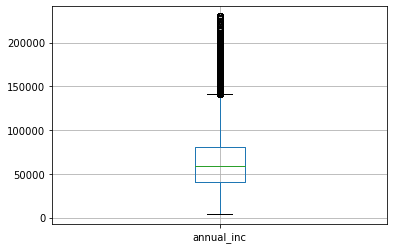

In [59]:
# Boxplot of 'annual_inc' after removal of outliers

loan_df.boxplot(column=['annual_inc']) 

In [60]:
# Shape of the dataframe after removing outliers

loan_df.shape

(35781, 18)

## 3. DATA ANALYSIS

### Derived columns added to the dataframe using 'binning' technique

In [61]:
''' 
We shall create a derived column "annual_inc_category" which contains bins of different categories of annual_income.
Categories - [0-10000],[10000-25000],[25000-50000],[50000-100000],[100000-150000],[150000-200000],[200000-250000]

'''

loan_df['annual_inc_category'] = pd.cut(x=loan_df['annual_inc'], 
                                 bins=[0,10000,25000,50000,100000,150000,200000,250000])

In [62]:
# 7 bins/categories of annual_inc is created

loan_df['annual_inc_category'].unique()

[(25000, 50000], (10000, 25000], (50000, 100000], (100000, 150000], (200000, 250000], (150000, 200000], (0, 10000]]
Categories (7, interval[int64, right]): [(0, 10000] < (10000, 25000] < (25000, 50000] < (50000, 100000] < (100000, 150000] < (150000, 200000] < (200000, 250000]]

In [63]:
# To decide the bin size, we need the description of 'dti'

loan_df['dti'].describe()

count    35781.000000
mean        13.412951
std          6.631328
min          0.000000
25%          8.340000
50%         13.520000
75%         18.650000
max         29.990000
Name: dti, dtype: float64

In [64]:
''' 
We shall create a derived column "debt_to_income_category" which contains bins of different categories of 'dti'.
Categories - [0-5],[5-10],[10-15],[15-20],[20-25],[25-30]

'''

loan_df['debt_to_income_category'] = pd.cut(x=loan_df['dti'], bins=[0,5,10,15,20,25,30])

In [65]:
# Six bins/categories of dti is created

loan_df['debt_to_income_category'].unique()

[(0.0, 5.0], (15.0, 20.0], (10.0, 15.0], (20.0, 25.0], (5.0, 10.0], (25.0, 30.0], NaN]
Categories (6, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25] < (25, 30]]

In [66]:
# To decide the bin size, we need the description of 'int_rate'

loan_df['int_rate'].describe()

count    35781.000000
mean        11.954006
std          3.677521
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [67]:
''' 
We shall create a derived column "int_rate_category" which contains bins of different categories of 'interest'.
Categories - [5-10],[10-15],[15-20],[20-25]

'''

loan_df['int_rate_category'] = pd.cut(x=loan_df['int_rate'], bins=[5,10,15,20,25])

In [68]:
# 4 bins/categories of 'int_rate' is created

loan_df['int_rate_category'].unique()

[(15, 20], (10, 15], (5, 10], (20, 25]]
Categories (4, interval[int64, right]): [(5, 10] < (10, 15] < (15, 20] < (20, 25]]

In [69]:
# Shape of the dataframe ready for analysis

loan_df.shape

(35781, 21)

In [70]:
# First 5 records of the dataframe ready for analysis

loan_df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_months,issue_d_years,annual_inc_category,debt_to_income_category,int_rate_category
1,1077430,2500,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,...,Charged Off,car,GA,1.00,0,12,2011,"(25000, 50000]","(0, 5]","(15, 20]"
3,1076863,10000,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,Fully Paid,other,CA,20.00,0,12,2011,"(25000, 50000]","(15, 20]","(10, 15]"
5,1075269,5000,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,0,12,2011,"(25000, 50000]","(10, 15]","(5, 10]"
6,1069639,7000,60 months,15.96,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,Fully Paid,debt_consolidation,NC,23.51,0,12,2011,"(25000, 50000]","(20, 25]","(15, 20]"
7,1072053,3000,36 months,18.64,E,E1,MKC Accounting,9 years,RENT,48000.0,...,Fully Paid,car,CA,5.35,0,12,2011,"(25000, 50000]","(5, 10]","(15, 20]"


## Univariate analysis

In [71]:
# Number of loans fully paid and charged off

loan_df['loan_status'].value_counts()

Fully Paid     30686
Charged Off     5095
Name: loan_status, dtype: int64

### Continuous variables of the dataframe : 

- loan_amnt
- int_rate
- annual_income
- dti
- pub_rec_bankruptcies
- issue_d_months
- issue_d_years

### Categorical variables of the dataframe :

- id
- term
- grade
- sub_grade
- emp_title
- emp_length
- home_ownership
- verification_status
- loan_status
- purpose
- addr_state
- annual_inc_category
- debt_to_income_category
- int_rate_category



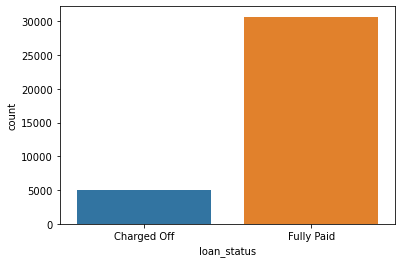

In [72]:
# Countplot for 'loan_status'

sns.countplot(x = loan_df["loan_status"])
plt.show()

#### Inference - 85.8% of the loans are fully paid (non-defaulters) and 14.2% of the loans are charged off (defaulters)

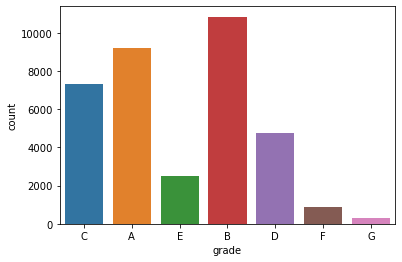

In [73]:
# Countplot for 'grade'

sns.countplot(x ='grade', data=loan_df)
plt.show()

- Loan grades are assigned based on both the borrower’s credit profile and the nature of the contract. 
- 'A' grade loans represent the lowest risk while 'G' grade loans are the riskiest.
#### Inference - B and A grade loans are issued the most, while riskier grade loans like E,F,G are issued less

C:\Users\gayth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


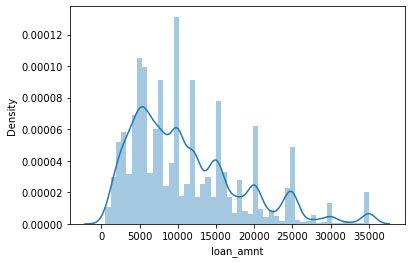

In [74]:
# Distribution plot for 'loan_amnt'

sns.distplot(loan_df['loan_amnt'])
plt.show()

#### Inference - Most of the loans are issued for loan_amnt - 5000

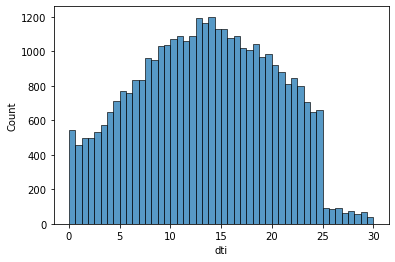

In [75]:
# Histogram of 'dti'

sns.histplot(loan_df['dti'])
plt.show()

#### Inference - The frequency of 'dti' (Debt To Income) is high around 14

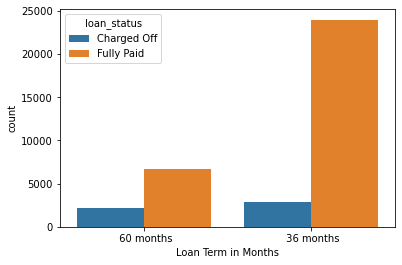

In [76]:
# Countplot for 'term'

sns.countplot(x = "term", hue = "loan_status", data = loan_df)
plt.xlabel("Loan Term in Months")
plt.show()

#### Inference - Around 75% loans are issued for '36 months' and 25% loans are issued for '60 months'

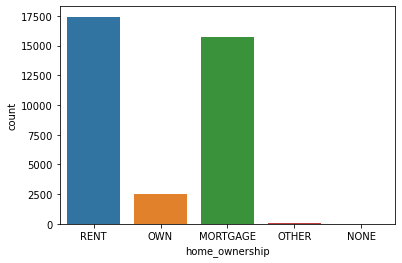

In [77]:
# Countplot for 'home_ownership'

sns.countplot(x = loan_df["home_ownership"])
plt.show()

#### Inference - Most of the loans are issued for clients who stay under 'RENT' or 'MORTGAGE'

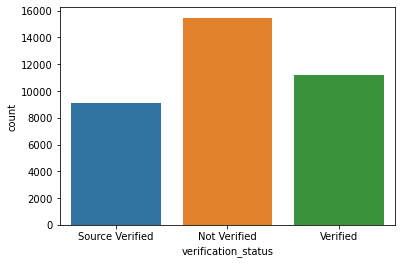

In [78]:
# Countplot for 'verification_status'

sns.countplot(x = loan_df["verification_status"])
plt.show()

#### Inference - 3 categories of Verification_status : 
Source Verified - client's income verified , Verified - client verified by LC , Not Verified

Since the cumulative percentage of 'Source Verified' and 'Verified' is higher than that of 'Not Verified', it implies that more number of 'Verified' clients are issued loans

## Segmented Univariate Analysis

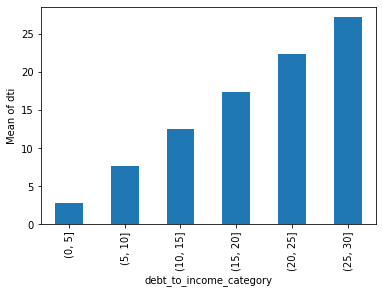

In [79]:
# Grouping by 'debt_to_income_category' and analysing the mean of 'dti' for each bin

loan_df.groupby('debt_to_income_category')['dti'].mean().plot(kind='bar',ylabel='Mean of dti')
plt.show()

#### Inference - Mean of debt_to_income (DTI) increases linearly across the splitted buckets / bins

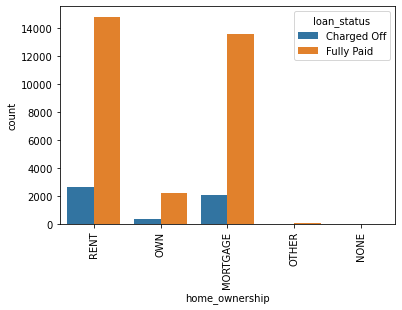

In [80]:
# Grouping by 'home_ownership' category and analysing how many clients fully paid or charged off for each category

sns.countplot(x='home_ownership',hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.show()

#### Inference - Charged Off loans are relatively lower for clients those who own the house compared to other categories

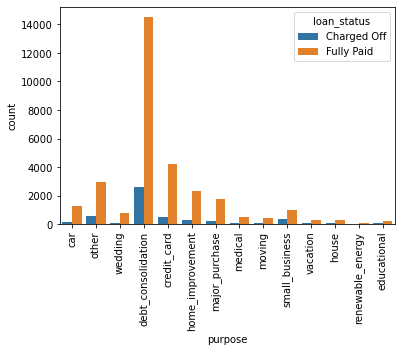

In [81]:
# Grouping by 'purpose' category and analysing how many clients fully paid or charged off for each purpose of loan

sns.countplot(x='purpose', hue="loan_status", data=loan_df)
plt.xticks(rotation=90)
plt.show()

#### Inferences
- Most of the fully paid clients have opted loan for 'debt_consolidation' purpose
- Charged off loans are also higher for 'debt_consolidation' purpose compared to other purposes of loan
- Hence it is obvious that most of the loans are issued for 'debt_consolidation' purpose

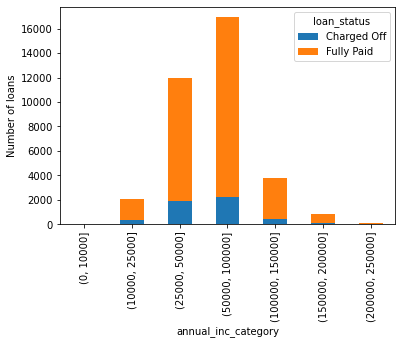

In [82]:
# Grouping by 'annual_inc_category' and analysing how many clients fully paid or Charged Off for each bin

loan_df.groupby('annual_inc_category')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,
                                                                                    ylabel = 'Number of loans')
plt.show()

#### Inference - Clients having annual_inc > 100000 are likely to pay the loan fully

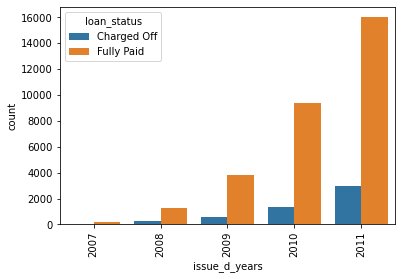

In [83]:
# Grouping by years of loan-issue date and analysing how many clients fully paid or charged off for each year

sns.countplot(x='issue_d_years',hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.show()

#### Inference - The number Charged Off and Fully Paid loans have linear growth over the years 2007 - 2011

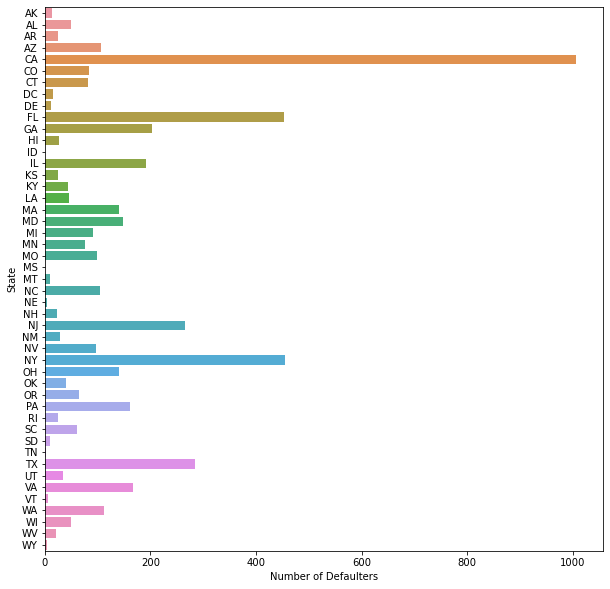

In [84]:
# Number of defaulters in each state

g = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Number of Defaulters')
plt.ylabel('State')
plt.show()

#### Inference - More defaulters are from the state 'CA'

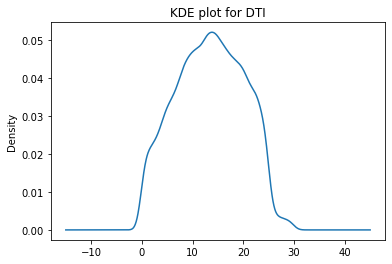

In [85]:
# Kernel density estimate (KDE) plot for visualizing the distribution using a continuous probability density curve
# kde plot for 'dti'

loan_df['dti'].plot(kind='kde', title = "KDE plot for DTI",xlabel = 'DTI')
plt.show()

#### Inference - Most of the issued loans have 'dti' values populated around 13-14

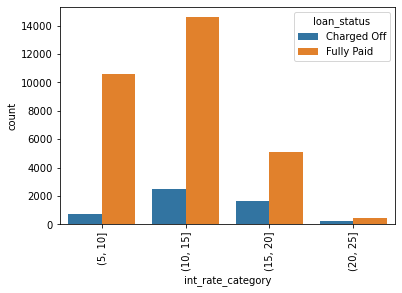

In [86]:
# Grouping by int_rate_category and analysing how many clients fully paid or charged off for each bin

sns.countplot(x='int_rate_category',hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.show()

#### Inference - If the interest rate is lower, the loans are likely to be fully paid

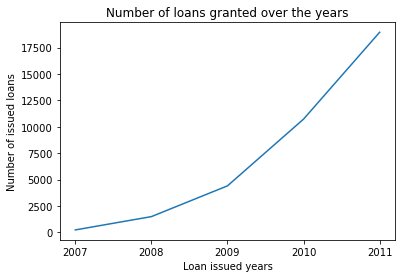

In [87]:
# Analysing the number of loans issued over the years using line graph

g = loan_df.groupby('issue_d_years')['id'].count()
g.plot.line(x_compat = True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('Number of loans granted over the years')
plt.xlabel('Loan issued years')
plt.ylabel('Number of issued loans')
plt.show()

#### Inference - The number of issued-loans linearly increase across the years 2007 - 2011

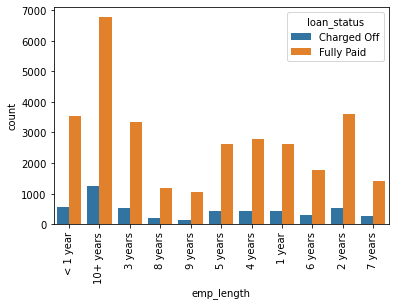

In [88]:
# Grouping by 'emp_length' and analysing how many clients fully paid or charged off for each category

sns.countplot(x ='emp_length', hue="loan_status", data=loan_df)
plt.xticks(rotation=90)
plt.show()

#### Inference - Employees with 10+ years tend to charge off more than other employees

## Bivariate Analysis

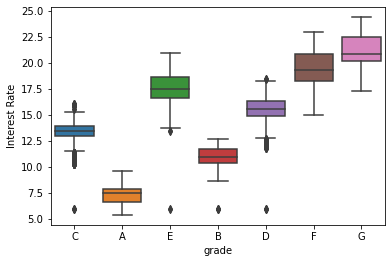

In [89]:
# Analysing interest rates across various grades of loan using boxplots

sns.boxplot(y='int_rate', x='grade', data=loan_df)
plt.ylabel('Interest Rate')
plt.show()

#### Inference - As the grades A,B,C,D,E,F,G are categorised from low to high risk,the interest rate increases as the risk increases

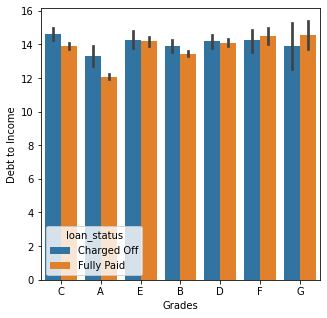

In [90]:
# Analysing grades of loans with their dti values and corresponding loan_status

plt.figure(figsize=(5,5))

sns.barplot(x='grade',y='dti',hue='loan_status',data = loan_df)
plt.xlabel('Grades')
plt.ylabel('Debt to Income')
plt.show()

#### Inference - Fully paid - grade A loans have the lowest debt_to_income values

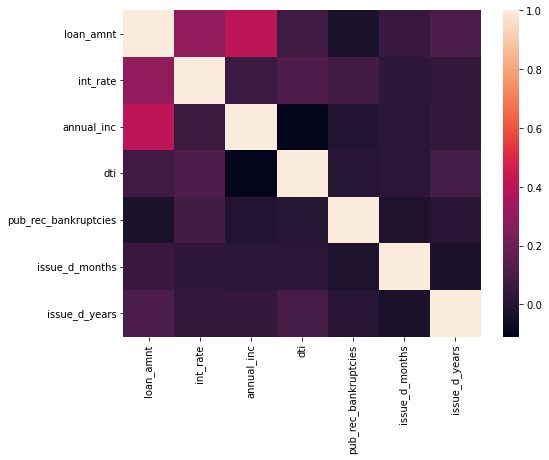

In [91]:
# Analysing correlation of continous variables in the 'loan_df' dataframe using heatmap

plt.figure(figsize=(8,6))
sns.heatmap(loan_df.corr())
plt.show()

#### Inferences from heatmap
- Loan_amnt and annual_inc are slightly correlated
- Int_rate and loan_amnt are slightly correlated

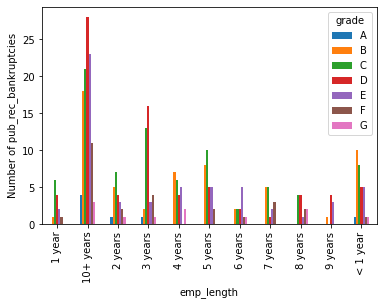

In [92]:
# Grouping by emp_length and grade for Charged Off clients to analyse pub_rec_bankruptcies

g = loan_df[loan_df['loan_status']=='Charged Off']
g.groupby(['emp_length','grade'])['pub_rec_bankruptcies'].sum().unstack().plot(kind='bar',
                                                                   ylabel='Number of pub_rec_bankruptcies')
plt.show()

#### Inference - Many bankruptcies tend to occur with Charged Off clients having 10+ years working experience and mostly they are of D-grade loans

In [93]:
# Creating a dataframe containing important numeric columns for analysis

numeric_columns = loan_df[['loan_amnt','int_rate','annual_inc','dti']]

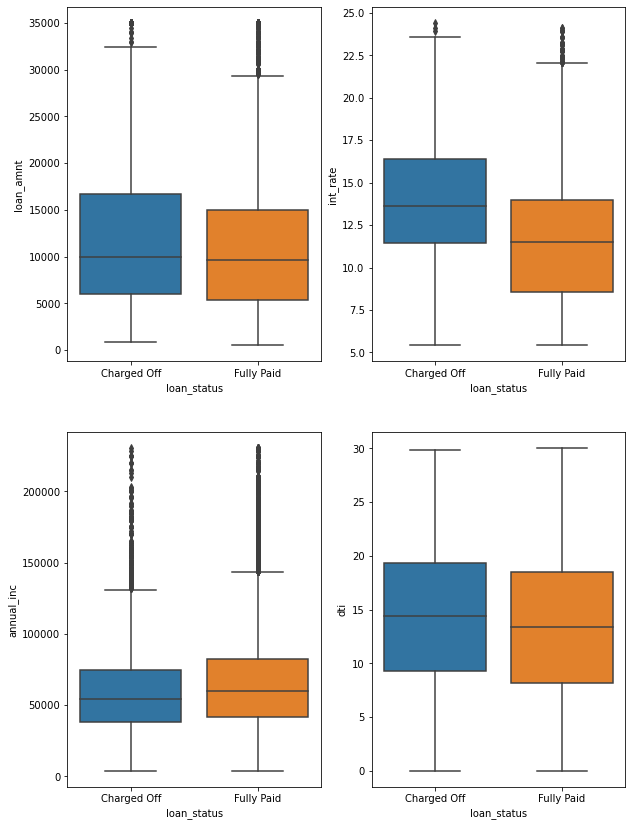

In [94]:
# Boxplot for numeric columns against the target variable 'loan_status'

plt.figure(figsize=(10,30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(4,2, i + 1)
    sns.boxplot(y=numeric_columns.columns[i], x='loan_status', data = loan_df)
plt.show()

#### Inferences
- Median for the boxplot of loan amount and loan status is more or less the same for fully paid and charged off clients, which means the loan amount cannot be used to predict default / non-default 
- Charged Off clients tend to have higher interest rates compared to Fully paid clients
- Annual income of fully paid clients is slightly higher than that of Charged Off clients
- Debt to Income value tends to be high for Charged Off clients rather than fully paid ones

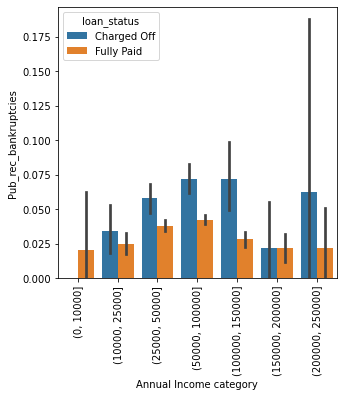

In [95]:
# Analysing annual_inc_category with their pub_rec_bankruptcies and corresponding loan_status

plt.figure(figsize=(5,5))
sns.barplot(x='annual_inc_category',y='pub_rec_bankruptcies',hue='loan_status',data = loan_df)
plt.xlabel('Annual Income category')
plt.ylabel('Pub_rec_bankruptcies')
plt.xticks(rotation=90)
plt.show()

#### Inferences 
- There are no Charged Off loans for annual income <10000
- Clients with pub_rec_bankruptcies tend to get charged off

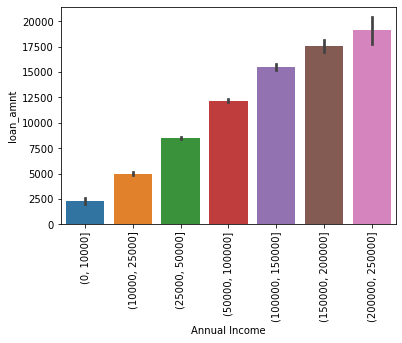

In [96]:
# Analysing relationship between loan_amnt and annual_income buckets using barplot

sns.barplot(y ='loan_amnt', x ='annual_inc_category', data = loan_df)
plt.ylabel('loan_amnt')
plt.xlabel('Annual Income')
plt.xticks(rotation=90)
plt.show()

#### Inference - As annual income increases, loan amount also increases (shows positive correlation)

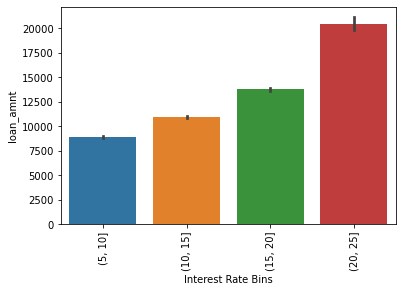

In [97]:
# Analysing relationship between loan_amnt and int_rate buckets using barplot

sns.barplot(y ='loan_amnt', x ='int_rate_category', data = loan_df)
plt.ylabel('loan_amnt')
plt.xlabel('Interest Rate Bins')
plt.xticks(rotation=90)
plt.show()

#### Inference - As loan_amount increases, interest rate also increases (shows positive correlation)

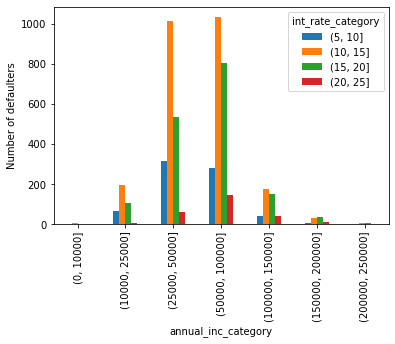

In [98]:
# Grouping by annual_inc_category and int_rate_category to analyse number of defaulters in each category

g = loan_df[loan_df['loan_status']=='Charged Off']
g.groupby(['annual_inc_category','int_rate_category'])['loan_status'].count().unstack().plot(kind='bar',
                                                                   ylabel='Number of defaulters')
plt.show()

#### Inference - Many defaulters tend to have[50000-100000] annual income and most probably the interest rates of these loans fall under [10%-15%] category

# Insights obtained from Univariate analysis

- 85.8% of the loans are fully paid (non-defaulters) and 14.2% of the loans are charged off (defaulters)
- B and A grade loans are issued the most, while riskier grade loans like E,F,G are issued less
- Most of the loans are issued for loan_amnt - 5000
- The frequency of 'dti' (Debt To Income) is high around 14, which means most of the issued loans have debt to income ratio around 14
- Around 75% loans are issued for '36 months' and 25% loans are issued for '60 months'
- Most of the loans are issued for clients who stay under 'RENT' or 'MORTGAGE'
- The cumulative percentage of 'Source Verified' and 'Verified' is higher than that of 'Not Verified', which implies that more number of 'Verified' clients are issued loans

# Insights obtained from Segmented Univariate analysis
- Mean of debt_to_income (DTI) increases linearly across the splitted debt_to_income buckets / bins
- Charged Off loans are relatively lower for clients those who own the house compared to other categories of home ownership
- Most of the loans are issued for 'debt_consolidation' purpose
- Clients having annual_inc > 100000 are likely to pay the loan fully
- The number of Charged Off and Fully Paid loans have linear growth over the years 2007 - 2011
- More defaulters are from the state 'CA'
- Most of the issued loans have 'dti' values populated around 13-14
- If the interest rate is lower, the loans are likely to be fully paid
- The number of issued-loans linearly increase across the years 2007 - 2011
- Employees with 10+ years tend to get charged off more than other employees

# Insights obtained from Bivariate analysis
- As the grades A,B,C,D,E,F,G are categorised from low to high risk,the interest rate increases as the risk increases
- Fully paid - grade A loans have the lowest debt_to_income values
- From the heatmap, we observed that loan_amnt and annual_inc are correlated while int_rate and loan_amnt are also slightly correlated 
- As annual income increases, loan amount also increases (shows positive correlation)
- As loan_amount increases, interest rate also increases (shows positive correlation)
- Many bankruptcies tend to occur with Charged Off clients having 10+ years working experience and mostly they are of D-grade loans
- Median for the boxplot of loan amount and loan status is more or less the same for fully paid and charged off clients, which means the loan amount cannot be used to predict default / non-default
- Charged Off clients tend to have higher interest rates compared to Fully paid clients
- Annual income of fully paid clients is slightly higher than that of Charged Off clients
- Debt to Income value tends to be high for Charged Off clients rather than fully paid ones
- There are no Charged Off loans for annual income <10000
- Clients with pub_rec_bankruptcies tend to get charged off
- Many defaulters tend to have[50000-100000] annual income and most probably the interest rates of these loans fall under [10%-15%] category

## 4. RECOMMENDATIONS

#### - 5 Major predictors (strong indicators) of deciding whether a loan applicant tend to default or not :
        1. DTI 
        2. Grades
        3. Verification Status
        4. Annual income
        5. Pub_rec_bankruptcies
#### - Other considerations for 'defaults' :
        1. Clients from 'CA' state 
        2. Clients having income in the range 50000-100000
        3. Clients having pub_rec_bankruptcies
        4. Clients with least grades like E,F,G 
        5. Clients with very high Debt to Income value
        6. Clients with working experience 10+ years